In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import BorderlineSMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv ('Mexico_covid.csv')     # reading data from CSV file
arr = df.to_numpy()                   # converting data to numpy

In [ ]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-04-17,z482b8,1,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,México,97,97
1,2021-04-17,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,México,97,1
2,2021-04-17,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,México,97,97
3,2021-04-17,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,México,97,97
4,2021-04-17,zz8e77,1,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400311,2021-04-17,57e6c4,1,4,9,1,30,9,6,2,2021-04-13,2021-04-13,9999-99-99,2,2,70,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,6,99,México,97,2
6400312,2021-04-17,674649,2,4,5,1,5,5,10,1,2021-04-16,2021-04-14,9999-99-99,97,2,4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97
6400313,2021-04-17,5ca446,2,9,9,2,9,9,3,1,2021-04-16,2021-04-16,9999-99-99,97,2,42,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97
6400314,2021-04-17,6bdeec,2,4,9,1,9,7,89,1,2021-04-17,2021-04-13,9999-99-99,97,2,45,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,97,1,1,3,99,México,97,97


In [ ]:
arr = df['UCI'].values

In [ ]:
print(set(arr))
np.sum(arr == 1), np.sum(arr == 2), np.sum(arr == 3), np.sum(arr == 4), np.sum(arr == 97) 

{97, 2, 99, 1}


(53232, 662640, 0, 0, 5676014)

In [ ]:
df["UCI"] = pd.to_numeric(df["UCI"])

KeyError: ignored

In [ ]:
df = df.loc[df['UCI'] < 3]

In [ ]:
arr = df['RESULTADO_LAB'].values

In [ ]:
np.sum(arr == 1)

374875

In [ ]:
df = df.loc[df['RESULTADO_LAB'] == 1]

In [ ]:
df.shape

(374875, 40)

In [ ]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
16,2021-04-17,z166d5,1,12,1,1,1,1,1,2,2020-04-17,2020-04-14,9999-99-99,2,1,32,1,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,1,2,97,3,99,México,97,2
27,2021-04-17,z4494e,1,12,8,1,8,8,37,2,2020-11-09,2020-11-02,9999-99-99,2,2,49,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,México,97,2
35,2021-04-17,z22bc2,2,13,19,2,19,19,39,2,2020-06-26,2020-06-25,9999-99-99,2,1,60,1,97,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,1
99,2021-04-17,z2540f,1,12,27,2,27,27,2,2,2020-05-06,2020-04-30,9999-99-99,2,2,61,1,97,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,97,3,99,México,97,2
152,2021-04-17,1236ca,1,3,15,2,15,15,60,2,2020-12-14,2020-12-12,2020-12-17,2,1,58,1,97,99,99,1,2,2,2,1,2,1,2,1,2,2,1,1,2,97,3,99,México,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391471,2021-04-17,e2ec19,1,12,17,2,17,17,4,2,2021-04-15,2021-04-11,9999-99-99,2,1,54,1,97,2,2,2,1,2,2,2,2,2,2,2,2,99,1,1,2,97,3,99,México,97,2
6391673,2021-04-17,a10c4a,1,12,17,2,12,17,7,2,2021-04-16,2021-04-12,9999-99-99,2,1,77,1,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,2,97,3,99,México,97,2
6393983,2021-04-17,d77e1b,1,4,13,2,30,13,69,2,2021-04-16,2021-04-09,9999-99-99,2,1,52,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,2
6398774,2021-04-17,6384c3,1,4,10,2,10,10,23,2,2021-04-16,2021-04-11,9999-99-99,2,1,49,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,2


In [ ]:
Columns_taken = { 'SEXO', 'INTUBADO', 'NEUMONIA',  'EDAD','DIABETES', 	'EPOC', 	'ASMA', 'INMUSUPR'	,'HIPERTENSION'	, 'OTRA_COM'	, 'CARDIOVASCULAR', 	'OBESIDAD', 	'RENAL_CRONICA', 	'TABAQUISMO',	'UCI'}

Total_rows,Total_column = df.shape

for i in df.columns:
  if(i not in Columns_taken):
    df.drop(i,axis=1,inplace=True)

df.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI
16,1,2,1,32,1,2,2,2,1,2,2,2,2,2,2
27,1,2,2,49,2,2,2,2,2,2,2,2,2,2,2
35,2,2,1,60,1,2,2,2,2,2,2,2,2,2,1
99,2,2,2,61,2,2,2,2,1,2,2,2,2,2,2
152,2,2,1,58,1,2,2,2,1,2,1,2,1,2,2


In [ ]:
df = df.rename({"SEXO":"SEX","INTUBADO":"INTUBATED","NEUMONIA":"PNEUMONIA","EDAD":"AGE","DIABETES":"DIABETES","EPOC":"COPD","ASMA":"ASTHMA","INMUSUPR":"INMUSUPR","HIPERTENSION":"HYPERTENSION","OTRA_COM":"OTHER_COM ","CARDIOVASCULAR":"CARDIOVASCULAR","OBESIDAD":"OBESITY","RENAL_CRONICA":"KIDNEY_CHRONICLE","TABAQUISMO":"SMOKING","UCI":"ICU"}, axis='columns')

In [ ]:
df.head()

,SEX,INTUBATED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,KIDNEY_CHRONICLE,SMOKING,ICU
16,1,2,1,32,1,2,2,2,1,2,2,2,2,2,2
27,1,2,2,49,2,2,2,2,2,2,2,2,2,2,2
35,2,2,1,60,1,2,2,2,2,2,2,2,2,2,1
99,2,2,2,61,2,2,2,2,1,2,2,2,2,2,2
152,2,2,1,58,1,2,2,2,1,2,1,2,1,2,2


COUNT OF NULL VALUES

In [ ]:
for i in df.columns:
  if(i == 'AGE'):
    continue
  else:
    arr = df[i].values
    print(i, np.sum(arr == 97) + np.sum(arr == 98))

SEX 0
INTUBATED 0
PNEUMONIA 0
DIABETES 1323
COPD 1141
ASTHMA 1098
INMUSUPR 1186
HYPERTENSION 1227
OTHER_COM  3172
CARDIOVASCULAR 1194
OBESITY 1125
KIDNEY_CHRONICLE 1145
SMOKING 1215
ICU 0


In [ ]:
for i in df.columns:
  print(i," ",df[i].unique())

SEX   [1 2]
INTUBATED   [2 1]
PNEUMONIA   [1 2]
AGE   [ 32  49  60  61  58  70  30  28  53  25  59  47  39  22  33  63  69  48
  62  57  55   4  51  73  67  45  71  64  31  37  75  50  65  41  76  34
  40  26  78  52  36  72  68  38  44  46  43  29  84  54  56  79  90  77
  21  82  86  80  19  42  35  83  81  66  74   1  24  27  18  20   2  85
  11   7   3  94   0  88  23  89  92  91  87  17   8  96  93  15  97  16
  10 100  99  14  95  12  13   5   9 101   6 103  98 105 108 102 104 106
 116 117 118 115 109]
DIABETES   [ 1  2 98]
COPD   [ 2  1 98]
ASTHMA   [ 2  1 98]
INMUSUPR   [ 2  1 98]
HYPERTENSION   [ 1  2 98]
OTHER_COM    [ 2 98  1]
CARDIOVASCULAR   [ 2  1 98]
OBESITY   [ 2  1 98]
KIDNEY_CHRONICLE   [ 2  1 98]
SMOKING   [ 2 98  1]
ICU   [2 1]


REMOVING NULL VALUES WITH DATA NORMALISATION


In [ ]:

for i in df.columns:
  if(i == 'AGE'):
    continue
  df.loc[:,i]= df[i].replace(2, 0)
  df.loc[:,i] = df[i].replace(98, 0)
  df.loc[:,i] = df[i].replace(99, 0)


In [ ]:
X = df.drop('ICU',axis=1)
y = df.ICU

scaler = MinMaxScaler()

X[['AGE']] = scaler.fit_transform(X[['AGE']])

oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.svm import SVC
lin_clf = SVC(kernel = 'linear')
lin_clf.fit(X_train[:10000], y_train[:10000])
from sklearn.model_selection import GridSearchCV


X_TRAIN = X_train[:5000]
Y_TRAIN = y_train[:5000]

# defining parameter range
param_grid = [
  {'C': [0.1 , 1, 10, 100], 'kernel': ['linear']}
 ]
  
grid = GridSearchCV(SVC() , param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
grid.fit(X_TRAIN, Y_TRAIN)
# from sklearn.metrics import accuracy_score

# y_pred = lin_clf.predict(X_test)
# classification_report(y_test, y_pred)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.784, total=   0.2s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.782, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.764, total=   0.2s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.779, total=   0.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.782, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.784, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.782, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.764, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.779, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
from sklearn.svm import SVC

tuned_esm = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
tuned_esm.fit(X_train[:100000], y_train[:100000])

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_pred = tuned_esm.predict(X_test)

print('Recall:'  , recall_score(y_test,y_pred));
print('Precision:', precision_score(y_test,y_pred));
print('F1 Score:', f1_score(y_test,y_pred));
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred));

Recall: 0.6461039903264812
Precision: 0.8663916669909587
F1 Score: 0.7402059113628051
ROC-AUC-Score 0.7729581299595094


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
X_TRAIN = X_train[:10000]
Y_TRAIN = y_train[:10000]
classifier.fit(X_TRAIN, Y_TRAIN)

y_pred = classifier.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.72      0.89      0.80    102807\n           1       0.86      0.66      0.74    103375\n\n    accuracy                           0.77    206182\n   macro avg       0.79      0.77      0.77    206182\nweighted avg       0.79      0.77      0.77    206182\n'

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly')
X_TRAIN = X_train[:10000]
Y_TRAIN = y_train[:10000]
classifier.fit(X_TRAIN, Y_TRAIN)

y_pred = classifier.predict(X_test)
classification_report(y_test, y_pred)

In [ ]:
0.0001 < gamma < 10
0.1 < c < 100

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_TRAIN = X_train[:5000]
Y_TRAIN = y_train[:5000]

# defining parameter range

test_error = []
train_error = []

degree = [1,2,3,4,5,6,7,8,9,10]

for C1 in degree:
    classifier = SVC(kernel = 'poly', degree = C1)
    classifier.fit(X_TRAIN, Y_TRAIN)
  
    y_test_pred = classifier.predict(X_test[:5000])
    y_train_pred = classifier.predict(X_train[:5000])

    test_error.append(accuracy_score(y_test[:5000],y_test_pred))
    train_error.append(accuracy_score(y_train[:5000], y_train_pred))

  
  


In [ ]:
test_error

In [ ]:
train_error

In [ ]:
X_axis = []
for c1 in c:
  for g in gamma:
    s = "( "
    s+= str(c1)
    s+=", "
    s+=str(g)
    s+=")"
    X_axis.append(s)

In [ ]:
X_axis

In [ ]:
import matplotlib.pyplot as plt

plt.plot(degree,test_error,label='test')
plt.plot(degree,train_error,label='train')
plt.xlabel('degree values for poly Kernel')
plt.ylabel('Accuracies')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
classifier1 = SVC(kernel = 'poly', degree = 2)
classifier1.fit(X_train[:10000], y_train[:10000])

In [ ]:
y_pred = classifier1.predict(X_test[:5000])

In [ ]:
print("recall score is ", recall_score(y_pred, y_test[:5000]))
print("accuracy score is ", accuracy_score(y_pred, y_test[:5000]))
print("F1 score is ", f1_score(y_pred, y_test[:5000]))
print("AUC_ROC score is ", roc_auc_score(y_pred, y_test[:5000]))
print("Precision score is ", precision_score(y_pred, y_test[:5000]))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_TRAIN = X_train[:5000]
Y_TRAIN = y_train[:5000]

# defining parameter range
param_grid = [
  {'C': [0.1 , 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
 ]
  
grid = GridSearchCV(SVC() , param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_TRAIN, Y_TRAIN)
# y_pred = svclassifier.predict(X_TEST)

# print('Recall:'  , recall_score(Y_TEST,y_pred));
# print('Precision:', precision_score(Y_TEST,y_pred));
# print('F1 Score:', f1_score(Y_TEST,y_pred));
# print('ROC-AUC-Score' , roc_auc_score(Y_TEST,y_pred));

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

In [ ]:
tuned_estimator = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
tuned_estimator.fit(X_train[:100000], y_train[:100000])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_pred = tuned_estimator.predict(X_test)

print('Recall:'  , recall_score(y_test,y_pred));
print('Precision:', precision_score(y_test,y_pred));
print('F1 Score:', f1_score(y_test,y_pred));
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred));

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Removing unkwown ICU values


In [ ]:
# Creating Pie chart
def createPieChart(ICU_list, data, title, legend_title):
# Creating explode data
  explode = (0.1, 0.0)

# Creating color parameters
  colors = ( "orange", "cyan")

# Wedge properties
  wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
  def func(pct, allvalues):
	  absolute = int(pct / 100.*np.sum(allvalues))
	  return "{:.1f}%\n({:d} )".format(pct, absolute)

# Creating plot
  fig, ax = plt.subplots(figsize =(10, 7))
  wedges, texts, autotexts = ax.pie(data,
								  autopct = lambda pct: func(pct, data),
								  explode = explode,
								  labels = ICU_list,
								  shadow = True,
								  colors = colors,
								  startangle = 90,
								  wedgeprops = wp,
								  textprops = dict(color ="magenta"))

# Adding legend
  ax.legend(wedges, ICU_list,
		  title =legend_title,
		  loc ="center left",
		  bbox_to_anchor =(1, 0, 0.5, 1))

  plt.setp(autotexts, size = 8, weight ="bold")
  ax.set_title(title)

# show plot
plt.show()


In [ ]:
df = df.reset_index()

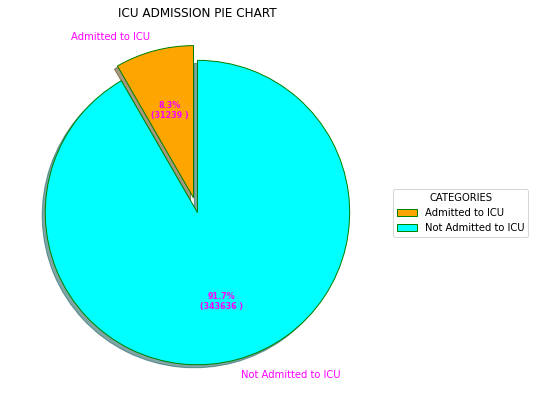

In [ ]:
tot_rows, tot_col = df.shape

ICU = 0
count = 0 

arr = df['ICU'].values
ICU = np.sum(arr == 1)

ICU_list = ['Admitted to ICU', 'Not Admitted to ICU']
data = [ICU, tot_rows - ICU]

createPieChart(ICU_list, data, 'ICU ADMISSION PIE CHART', 'CATEGORIES')

In [ ]:
MALE_ICU = 0
FEMALE_ICU = 0
for i in range(tot_rows):
  if(df['ICU'][i] == 1):
    if(df['SEX'][i] == 1):       # 1 represents famale whereas 0 represents male
      FEMALE_ICU += 1
    elif (df['SEX'][i] == 0):
      MALE_ICU += 1



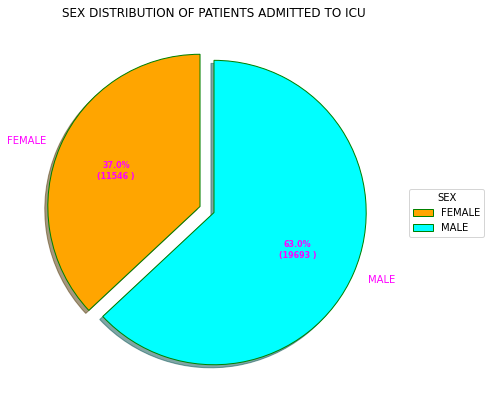

In [ ]:
ICU_list = ['FEMALE', 'MALE']

data = [FEMALE_ICU, MALE_ICU]
createPieChart(ICU_list, data, 'SEX DISTRIBUTION OF PATIENTS ADMITTED TO ICU', 'SEX')


In [ ]:
MALE = 0
FEMALE = 0
for i in range(tot_rows):
    if(df['SEX'][i] == 1):
      FEMALE += 1
    elif (df['SEX'][i] == 0):
      MALE += 1

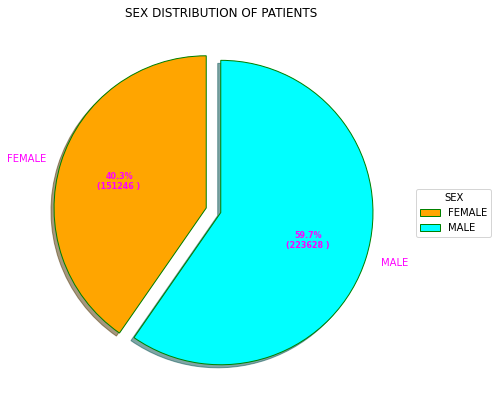

In [ ]:
covid_list = ['FEMALE', 'MALE']

data = [FEMALE, MALE]
createPieChart(ICU_list, data, 'SEX DISTRIBUTION OF PATIENTS', 'SEX')

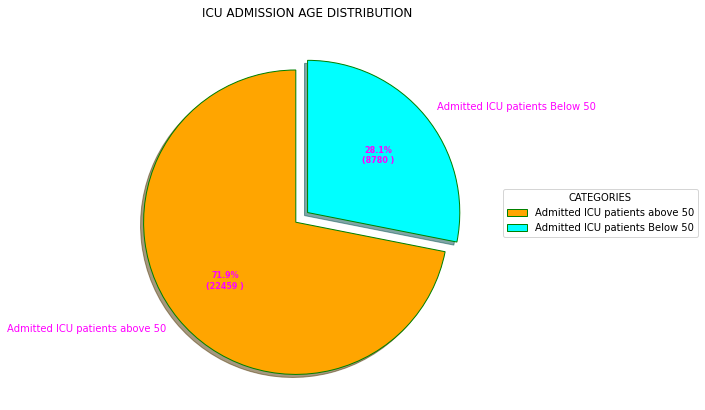

In [ ]:
ICU_ABOVE50 = 0
ICU_BELOW50 = 0
for i in range(tot_rows):
  if(df['ICU'][i] == 1):
    if(df['AGE'][i] >= 50):
      ICU_ABOVE50 += 1
    else:
      ICU_BELOW50 += 1

data = [ICU_ABOVE50, ICU_BELOW50]

ICU_list = ['Admitted ICU patients above 50', 'Admitted ICU patients Below 50']

createPieChart(ICU_list, data, 'ICU ADMISSION AGE DISTRIBUTION', 'CATEGORIES')


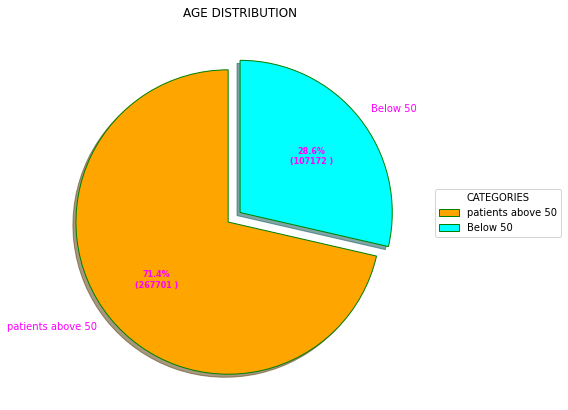

In [ ]:
ABOVE50 = 0
BELOW50 = 0
for i in range(tot_rows):
    if(df['AGE'][i] >= 50):
      ABOVE50 += 1
    else:
      BELOW50 += 1

data = [ABOVE50, BELOW50]

ICU_list = ['patients above 50', 'Below 50']

createPieChart(ICU_list, data, 'AGE DISTRIBUTION', 'CATEGORIES')


In [ ]:
df.shape

(374875, 16)

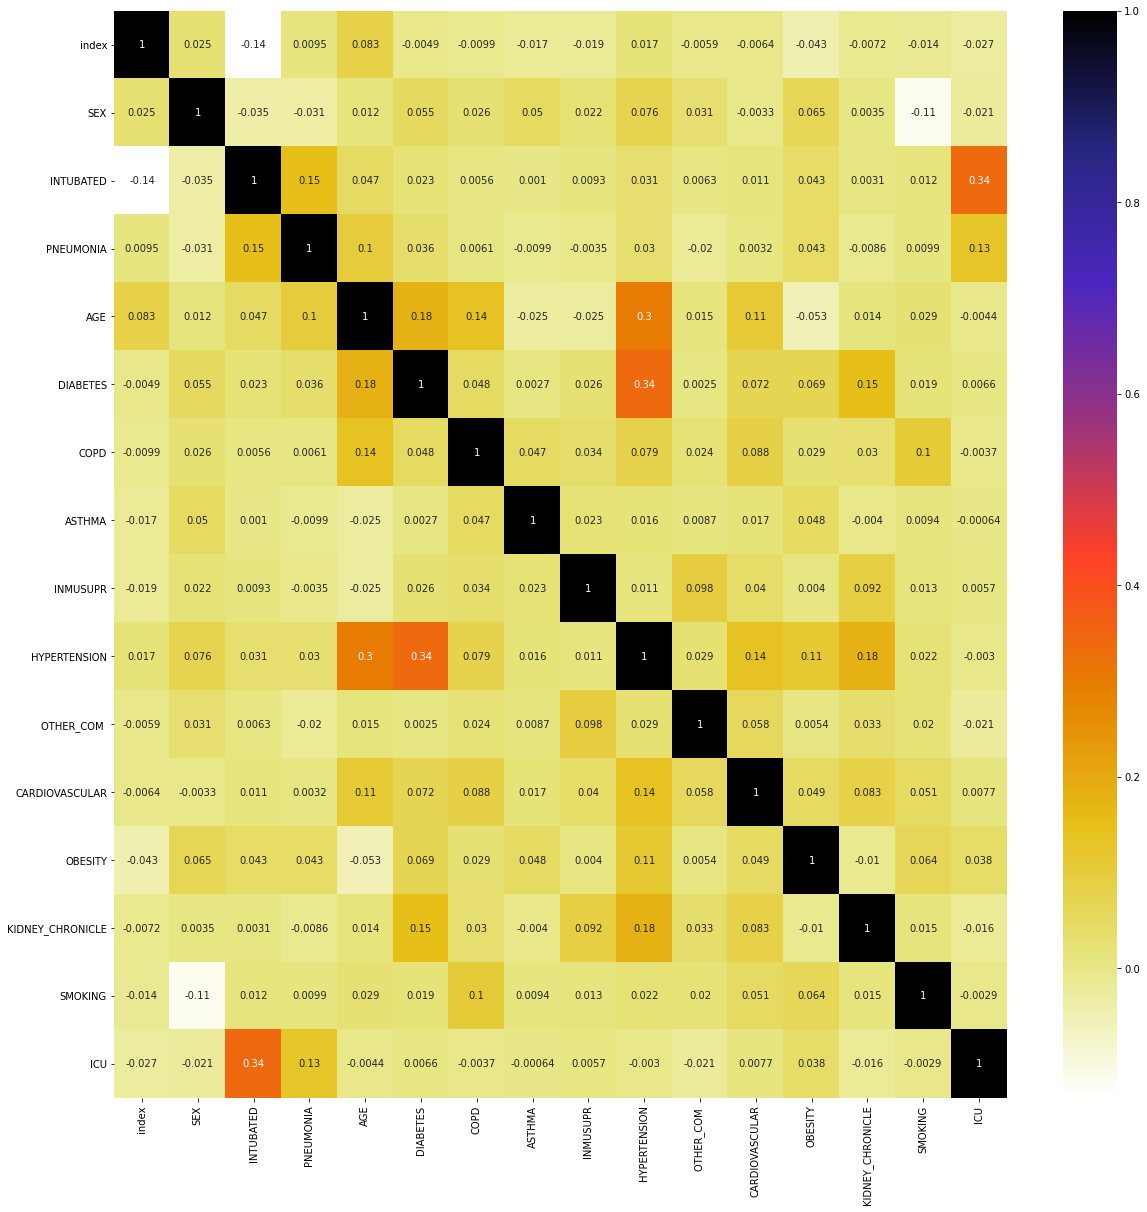

In [ ]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def plot_graph(x_list,y_list,Title,Xlabel,Ylabel):
  plt.bar(x_list,y_list,color='r', align = 'center', alpha = 0.5)
  plt.ylabel(Ylabel)
  plt.xlabel(Xlabel)
  plt.xticks(rotation = 90)
  plt.title(Title)
  plt.show()


In [ ]:
df.columns

Index(['index', 'SEX', 'INTUBATED', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD',
       'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_COM ', 'CARDIOVASCULAR',
       'OBESITY', 'KIDNEY_CHRONICLE', 'SMOKING', 'ICU'],
      dtype='object')

12
12


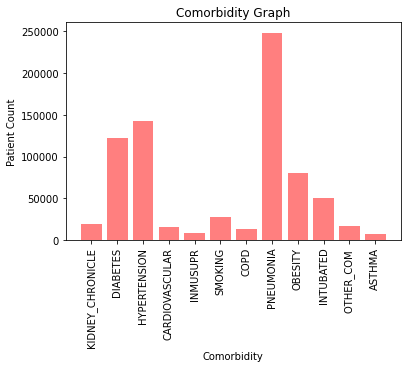

In [ ]:

comorbidity_list = {'INTUBATED', 'PNEUMONIA', 'DIABETES', 'HYPERTENSION','COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_COM ', 'CARDIOVASCULAR', 'OBESITY', 'KIDNEY_CHRONICLE', 'SMOKING'}


Attribute_list = df.columns

x_list = []
for i in comorbidity_list:
  x_list.append(i)
y_list = []

for i in comorbidity_list:
  count =0
  for j in df[i]:
    if(j==1):
      count+=1
  y_list.append(count)


print(len(x_list))
print(len(y_list))

plot_graph(x_list,y_list,'Comorbidity Graph','Comorbidity','Patient Count')


In [ ]:
X, Y = df.shape
dic = {}
for i in range(len(x_list)):
  dic[x_list[i]] = y_list[i]

In [ ]:
sorted_tuples = sorted(dic.items(), key=lambda item: item[1], reverse = True)

In [ ]:
x_list = []
y_list = []
for i in range(len(sorted_tuples)):
  x_list.append(sorted_tuples[i][0])
  y_list.append((sorted_tuples[i][1]/X)*100)

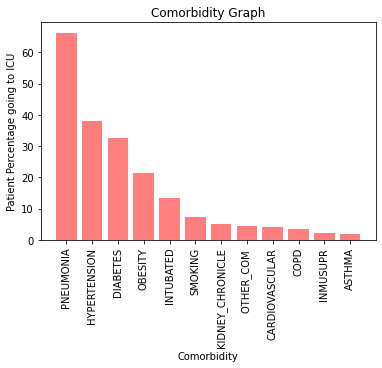

In [ ]:
plot_graph(x_list,y_list,'Comorbidity Graph','Comorbidity','Patient Percentage going to ICU')

In [ ]:
comorbidity_death = {}
icu_count = 0
for i in x_list:
  comorbidity_death[i] = 0

for i in range(df.shape[0]):
  p = df['ICU'][i]
  if(p == 1):
    icu_count += 1
    for j in x_list:
      if (df[j][i] == 1):
        comorbidity_death[j] += 1

death_count = []
for i in x_list:
  death_count.append((comorbidity_death[i] / icu_count)*100)


plot_graph(x_list,death_count,'Comorbidity Graph','Comorbidity','Patient Count')


KeyError: ignored

Naive Bayes


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

cnb = CategoricalNB()
y_pred_nb = cnb.fit(X_train, y_train).predict(X_test);
print('Recall:'  , recall_score(y_test,y_pred_nb));
print('Precision:', precision_score(y_test,y_pred_nb));
print('F1 Score:', f1_score(y_test,y_pred_nb));
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred_nb));

Logistic Regression


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

classifier = LogisticRegression()
pipeline = Pipeline(steps=[('m',classifier)])

scoring1 = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
           
n_scores = cross_validate(pipeline, X_train, y_train, scoring= scoring1, cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
l = n_scores['test_acc']
P = ['1','2','3','4','5']

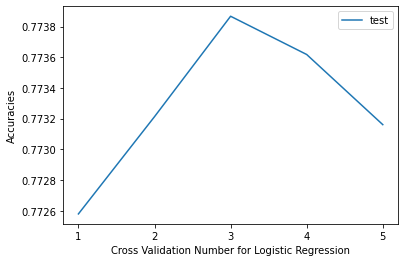

In [ ]:

plt.plot(P,l,label='test')
plt.xlabel('Cross Validation Number for Logistic Regression')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [ ]:
print('Accuracy obtained by Logistic Regression is ', np.mean(n_scores['test_acc']))
print('Precision obtained by Logistic Regression is ', np.mean(n_scores['test_prec_macro']))
print('Recall obtained by Logistic Regression is ', np.mean(n_scores['test_rec_micro']))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

classifier = GaussianNB()
pipeline = Pipeline(steps=[('m',classifier)])

scoring1 = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
           
n_scores = cross_validate(pipeline, X_train, y_train, scoring= scoring1, cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
l = n_scores['test_acc']
P = ['1','2','3','4','5']

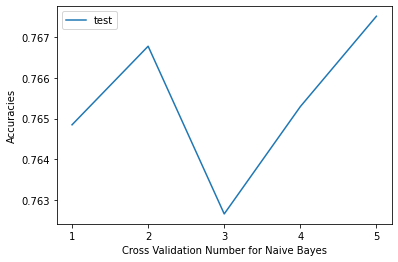

In [ ]:
plt.plot(P,l,label='test')
plt.xlabel('Cross Validation Number for Naive Bayes')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

SVM with Linear Kernel without Hyperparamter Tuning


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


from sklearn.svm import SVC

X_TRAIN = X_train[:80000]
Y_TRAIN = y_train[:80000]
X_TEST =  X_test[:20000]
Y_TEST =  y_test[:20000]

svclassifier = SVC(gamma = 0.1, kernel='rbf')
svclassifier.fit(X_TRAIN, Y_TRAIN)

y_pred = svclassifier.predict(X_TEST)

print('Recall:'  , recall_score(Y_TEST,y_pred));
print('Precision:', precision_score(Y_TEST,y_pred));
print('F1 Score:', f1_score(Y_TEST,y_pred));
print('ROC-AUC-Score' , roc_auc_score(Y_TEST,y_pred));


In [ ]:
from sklearn.model_selection import GridSearchCV

X_TRAIN = X_train[:10000]
Y_TRAIN = y_train[:10000]
X_TEST =  X_test[:200]
Y_TEST =  y_test[:200]

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']} 
  
grid = GridSearchCV(SVC() , param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_TRAIN, Y_TRAIN)
# y_pred = svclassifier.predict(X_TEST)

# print('Recall:'  , recall_score(Y_TEST,y_pred));
# print('Precision:', precision_score(Y_TEST,y_pred));
# print('F1 Score:', f1_score(Y_TEST,y_pred));
# print('ROC-AUC-Score' , roc_auc_score(Y_TEST,y_pred));

In [ ]:
SVMclassifier = SVC(C = 1, gamma = 10, kernel = 'linear')
SVMclassifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_pred = svclassifier.predict(X_test)

print('Recall:'  , recall_score(y_test,y_pred));
print('Precision:', precision_score(y_test,y_pred));
print('F1 Score:', f1_score(y_test,y_pred));
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred));

In [ ]:
grid.best_params_

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


from sklearn.svm import SVC

estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)
classification_report(y_predicted)

In [ ]:
y_pred = svclassifier.predict(X_TEST)

print('Recall:'  , recall_score(Y_TEST,y_pred));
print('Precision:', precision_score(Y_TEST,y_pred));
print('F1 Score:', f1_score(Y_TEST,y_pred));
print('ROC-AUC-Score' , roc_auc_score(Y_TEST,y_pred));

Random Forest using GridSearch CV

In [ ]:
rfc=RandomForestClassifier(random_state=37)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'max_depth' :['auto']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)

In [ ]:
pred_CV_rfc = CV_rfc.predict(X_test)
print('Recall:'  , recall_score(y_test,pred_CV_rfc));
print('Precision:', precision_score(y_test,pred_CV_rfc));
print('F1 Score:', f1_score(y_test,pred_CV_rfc));
print('ROC-AUC-Score' , roc_auc_score(y_test,pred_CV_rfc));

MLP Classifier



GridSearchCV for finding best parameters for MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


parameters = {'solver': ['adam','sgd'],'activation':['relu','tanh'], 'max_iter': [1250,1500,1750 ], 'alpha': 10.0 ** -np.arange(3, 8), 'hidden_layer_sizes':[8,10,12,14,16]}#'learning_rate':['adaptive','invscaling'],
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=True)

clf.fit(X_train[:10000], y_train[:10000])
# print(clf.score(trainX, trainY))
print(clf.best_params_)
#{'alpha': 1e-05, 'hidden_layer_sizes': 10, 'max_iter': 1250, 'solver': 'lbfgs'}

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 45.9min finished


{'activation': 'tanh', 'alpha': 1e-06, 'hidden_layer_sizes': 10, 'max_iter': 1750, 'solver': 'adam'}


Running MLP model for the set of learning rate

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


hidden_layer_array = range(1,100,10)
train_accuracy = []
test_accuracy = []

for i in hidden_layer_array:
  clf = MLPClassifier(solver='adam',activation='relu',max_iter=500,hidden_layer_sizes=i,learning_rate_init=0.01)
  clf.fit(X_train[:10000], y_train[:10000])
  pred_test = clf.predict(X_test[:2000])
  pred_train = clf.predict(X_train[:2000])
  test_accuracy.append(roc_auc_score(y_test[:2000],pred_test))
  train_accuracy.append(roc_auc_score(y_train[:2000],pred_train))
  print(roc_auc_score(y_test[:2000],pred_test))
  print(roc_auc_score(y_train[:2000],pred_train))
  print('done',i)


0.7546821292524695
0.7526725733813792
done 1
0.7446998206854755
0.7557284431416201
done 11
0.751195846863596
0.7776100908209893
done 21
0.7328613617703034
0.7735881041606034
done 31
0.7590159802944039
0.7787307264178965
done 41
0.748618638109687
0.7877208142185204
done 51
0.753799557764179
0.7984146081675882
done 61
0.7512228490507732
0.8001843223029986
done 71
0.753367022728841
0.7999642956797772
done 81
0.745384376134467
0.7939965735854038
done 91


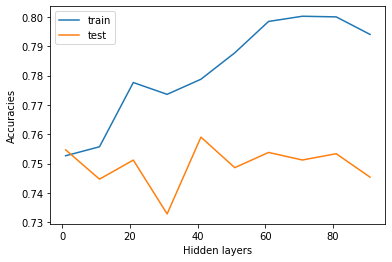

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hidden_layer_array,train_accuracy,label='train')
plt.plot(hidden_layer_array,test_accuracy,label='test')
plt.xlabel('Hidden layers')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='adam',activation='relu',max_iter=500,hidden_layer_sizes=41,learning_rate_init=0.01)
clf.fit(X_train[:10000], y_train[:10000])
pred_test = clf.predict(X_test[:2000])

print('Recall:'  , recall_score(y_test[:2000],pred_test));
print('Precision:', precision_score(y_test[:2000],pred_test));
print('F1 Score:', f1_score(y_test[:2000],pred_test));
print('ROC-AUC-Score' , roc_auc_score(y_test[:2000],pred_test));
print('Accuracy',accuracy_score(y_test[:2000],pred_test))
 


Recall: 0.7462834489593657
Precision: 0.7382352941176471
F1 Score: 0.7422375554460325
ROC-AUC-Score 0.7384293127743348
Accuracy 0.7385


Neural Network Using keras

Running Deep neural network model for set of learning rate

In [ ]:
# checking overfitting and underfitting



import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

learning_rate_array = [0.001,0.002,0.004,0.006,0.008,0.01, 0.02,0.04,0.06,0.08,0.1]
train_accuracy = []
test_accuracy = []

for k in learning_rate_array:
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=X_train.shape[1]))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(156, activation='relu')) 
  model.add(layers.Dense(128, activation='relu'))
   model.add(layers.Dense(64, activation='relu'))  
  model.add(layers.Dense(1, activation='sigmoid')) 
  adam = keras.optimizers.Adam(lr=k)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['binary_accuracy'])

  history = model.fit(X_train[:10000], y_train[:10000], epochs=100,batch_size=32)
  pred_test = model.predict(X_test[:2000])
  for i, j in enumerate(pred_test):
      if j > 0.5:
          pred_test[i] = 1
      else:
          pred_test[i] = 0

  pred_train = model.predict(X_train[:2000])
  for i, j in enumerate(pred_train):
      if j > 0.5:
          pred_train[i] = 1
      else:
          pred_train[i] = 0

  test_accuracy.append(roc_auc_score(y_test[:2000],pred_test))
  train_accuracy.append(roc_auc_score(y_train[:2000],pred_train))
  print(roc_auc_score(y_test[:2000],pred_test))
  print(roc_auc_score(y_train[:2000],pred_train))
  print('done',i)



Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6047 - binary_accuracy: 0.6886
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5247 - binary_accuracy: 0.7504
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5223 - binary_accuracy: 0.7442
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5076 - binary_accuracy: 0.7590
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5013 - binary_accuracy: 0.7586
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5023 - binary_accuracy: 0.7566
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5050 - binary_accuracy: 0.7606
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5042 - binary_accuracy: 0.7542
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4909 - binary_accuracy: 0.7640
Epoch 10/100
313/313 [======

Accuracy vs learning rate graph for DEEp neural network

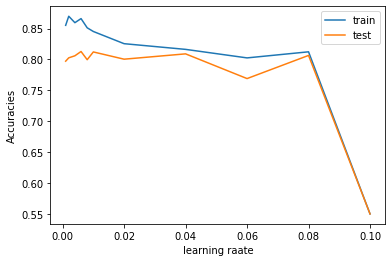

In [ ]:
import matplotlib.pyplot as plt

plt.plot(learning_rate_array,train_accuracy,label='train')
plt.plot(learning_rate_array,test_accuracy,label='test')
plt.xlabel('learning raate')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=X_train.shape[1]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
adam = keras.optimizers.Adam(lr=0.04)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['binary_accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=64)



Epoch 1/100
7518/7518 [==============================] - 18s 2ms/step - loss: 0.5023 - binary_accuracy: 0.7605
Epoch 2/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4820 - binary_accuracy: 0.7714
Epoch 3/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4760 - binary_accuracy: 0.7757
Epoch 4/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4685 - binary_accuracy: 0.7801
Epoch 5/100
7518/7518 [==============================] - 15s 2ms/step - loss: 0.4637 - binary_accuracy: 0.7839
Epoch 6/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4591 - binary_accuracy: 0.7866
Epoch 7/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4540 - binary_accuracy: 0.7885
Epoch 8/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4503 - binary_accuracy: 0.7911
Epoch 9/100
7518/7518 [==============================] - 16s 2ms/step - loss: 0.4477 - binary_accuracy: 0.7927
E

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



predictions = model.predict(X_test)
# y_pred = np.argmax(predictions, axis=1)
for i, j in enumerate(predictions):
    if j > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print('Recall:'  , recall_score(y_test,predictions));
print('Precision:', precision_score(y_test,predictions));
print('F1 Score:', f1_score(y_test,predictions));
print('ROC-AUC-Score' , roc_auc_score(y_test,predictions));

Recall: 0.8164643288996373
Precision: 0.8130430594355071
F1 Score: 0.8147501025653402
ROC-AUC-Score 0.8138417046562247
